1: Theory of Logistic Regression:

*Although the name is confusing, logistic regression allows us to solve classification problems, where we try to predict discrete categories.

*The convention for binary classification is to have two classes 0 and 1

*We can not use a normal linear regression model on binary groups because it will not lead to a good fit and prediction

*Therefore we can transfrom our linear regression to a logistic regression curve

*The Sigmoid(Logistic) Function takes any value and outputs it to be between 0 and 1.This means that we can take our linear regression function and place it into the Sigmoid Function. So we can transform our linear regression function into a logistic regression function.

*We can set a cutoff point at 0.5, and anything below it, results in class 0 and anything above it is class 1.We use logistic function to output a value ranging from 0 and 1.Besad on this probability we assign a class by putting a cutoff point at 0.5.If the probability is below 0.5 we will assign class 0 and if it is above 0.5 we will assign class 1 in our binary classification. 


2:Model Evaluation:

*After you train a logistic regression model on some training data, you will evaluate your model's performance on some test data.

*You can use confusion matrix to evaluate classification model. Confusion matrix is a table that is used to describe the performance of classification model based on a set of test data, in which the values are known.

*Basic Terminology:
    
    True Positive(TP): Our model predicted correctly and conforms the actual true values
    False Positive(FP): Our model predicted falsely as positive, but in reality they shold be negative according to actual data(Type 1 Error)
    True Negative(TN): Our model predicted correctly as negative and conforms with the actual negative values
    False Negative(FN): Our model predicted falsely as negative , but in reality they shold ne positive according to actual data(Type 2 Error)

*Rates:
    
    Accuracy:It means how often it is correct and it is calculated by (TP+TN)/Total
    
    Misclassification Rate:It means how often it is wrong overall and it is calculated by (FP+FN)/Total

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [129]:
train=pd.read_csv("C:/Users/ibrahim/Desktop/datasets/Data Science Jose Potilla/13-Logistic-Regression/titanic_train.csv")
train.head()
#SibSp represent number of siblings or spouses
#Parch represents number of parents/children on board
#Fare represents how much passengers pay for the ticket
#Embarked which places passengers embarked into abroad

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull() #firstly we need check the missing values and .isnull() return True for missing values and False for non missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


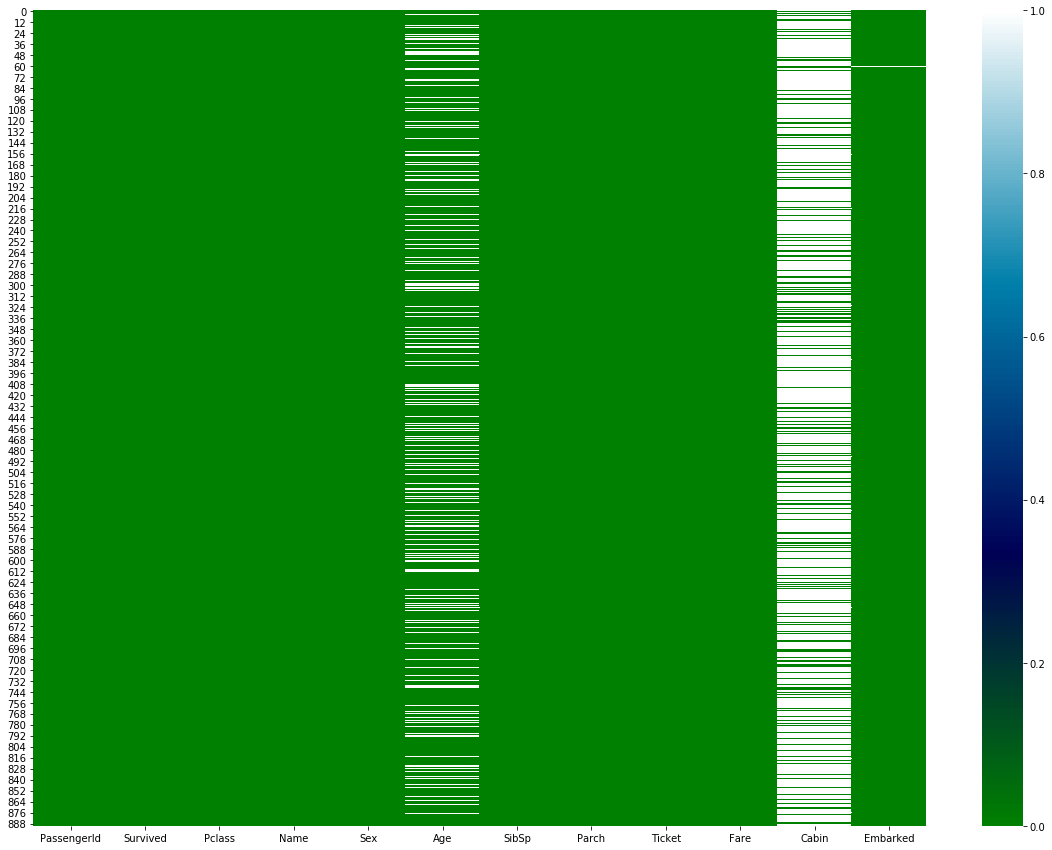

In [11]:
# We can see better the missing value with a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(train.isnull(),cmap="ocean")
# we see that there are missing values only in the Age and Cabin columns in our dataset

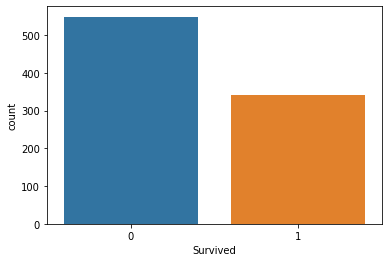

In [13]:
sns.countplot(train["Survived"])

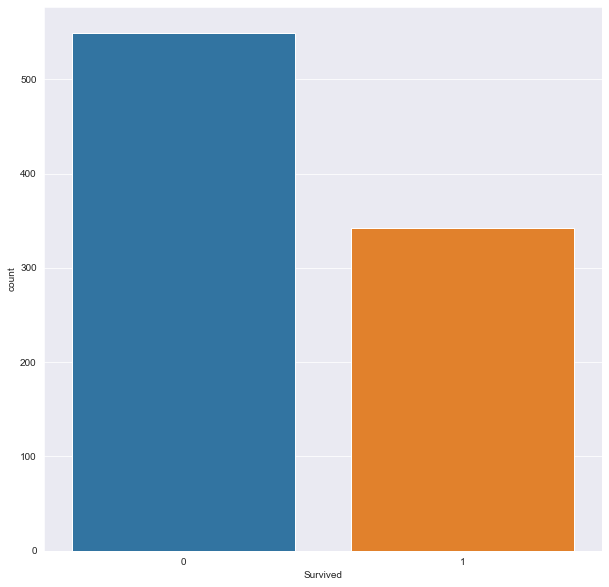

In [24]:
sns.set_style("darkgrid")#Set the aesthetic style of the plots like darkgrid, whitegrid, dark, white, ticks
plt.figure(figsize=(10,10))
sns.countplot(train["Survived"])# it seem that there 350 survivor versus 550 non survivors

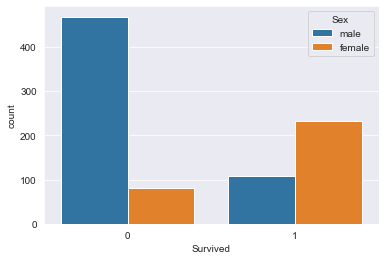

In [25]:
sns.countplot(train["Survived"],hue="Sex",data=train)
#It seems that the percentage of females among survived is much more higher than males

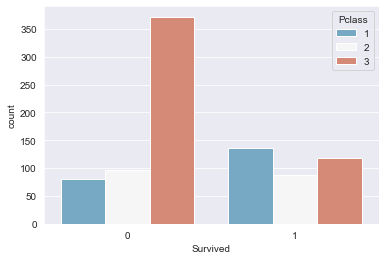

In [28]:
sns.countplot(train["Survived"],hue="Pclass",data=train,palette="RdBu_r")
#It seems that the percentage of class 3 or the lowes class has the highest deaths than others

In [37]:
train["Age"].value_counts() 

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [54]:
train.drop("Age_Categories",1,inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


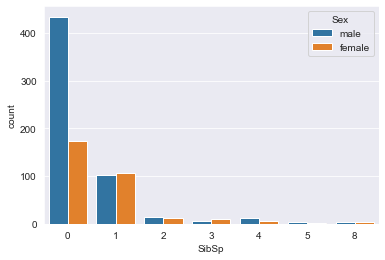

In [62]:
sns.countplot(x="SibSp",data=train,hue="Sex")
#It seems that most of the passenger do not have children or spouse,particularly among males

In [64]:
#I can get more interactive plot
import cufflinks as cf
cf.go_offline()
train["Age"].iplot(kind="hist")

In [67]:
train.iplot(x="Age",y="Survived",kind="bar") 

In [74]:
train[["Age","Pclass"]].iplot(kind="box")

In [85]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [99]:
len(train[(train["Survived"] == 1) & (train["Pclass"] == 3) & (train["Age"] <15)])

22

In [98]:
len(train[(train["Age"] < 15) & (train["Pclass"] == 3)])

54

In [103]:
len(train[(train["Survived"] == 1) & (train["Pclass"] == 3)])

119

In [105]:
len(train[train["Pclass"] == 3])

491

In [106]:
print(22/54,97/448) #here we understand that %40 of children in the third class survived while it is only %22 in other ages

0.4074074074074074 0.21651785714285715


In [107]:
len(train[(train["Survived"] == 1) & (train["Pclass"] == 1) & (train["Age"] <15)])

4

In [108]:
len(train[(train["Age"] < 15) & (train["Pclass"] == 1)])

5

In [111]:
len(train[(train["Survived"] == 1) & (train["Pclass"] == 1)])

136

In [112]:
len(train[train["Pclass"] == 1])

216

In [114]:
print(4/5, 131/211)
#when it comes to the first class,
#here we understand that %80 of children in the third class survived while it is only %62 in other ages

0.8 0.6208530805687204


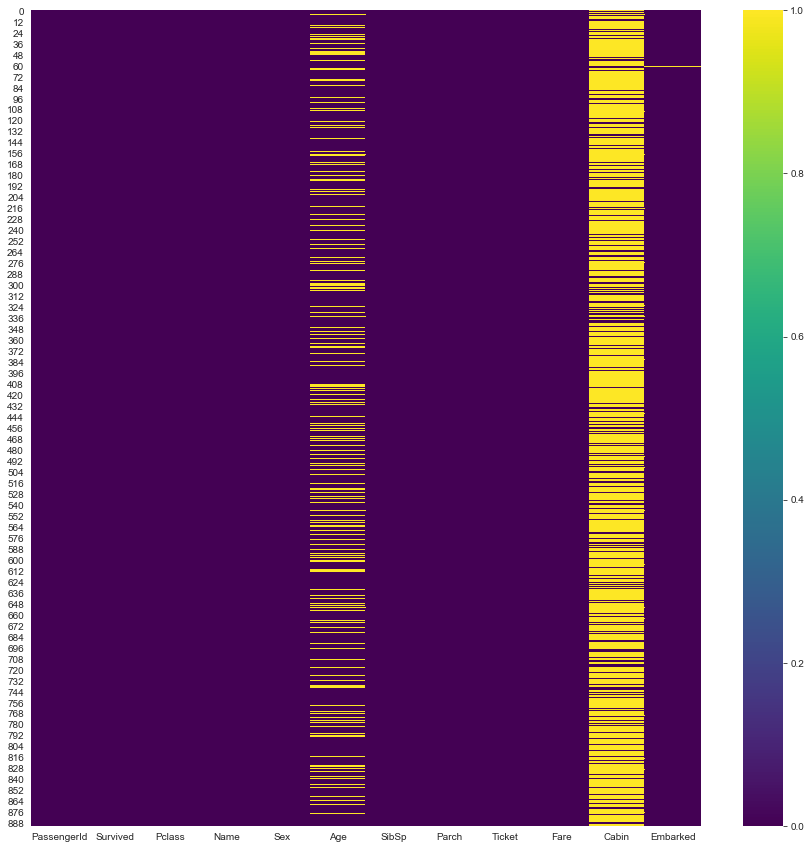

In [115]:
#In order to start mechine learning algorithm, we need to transform our data into an acceptable form 
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap="viridis") 

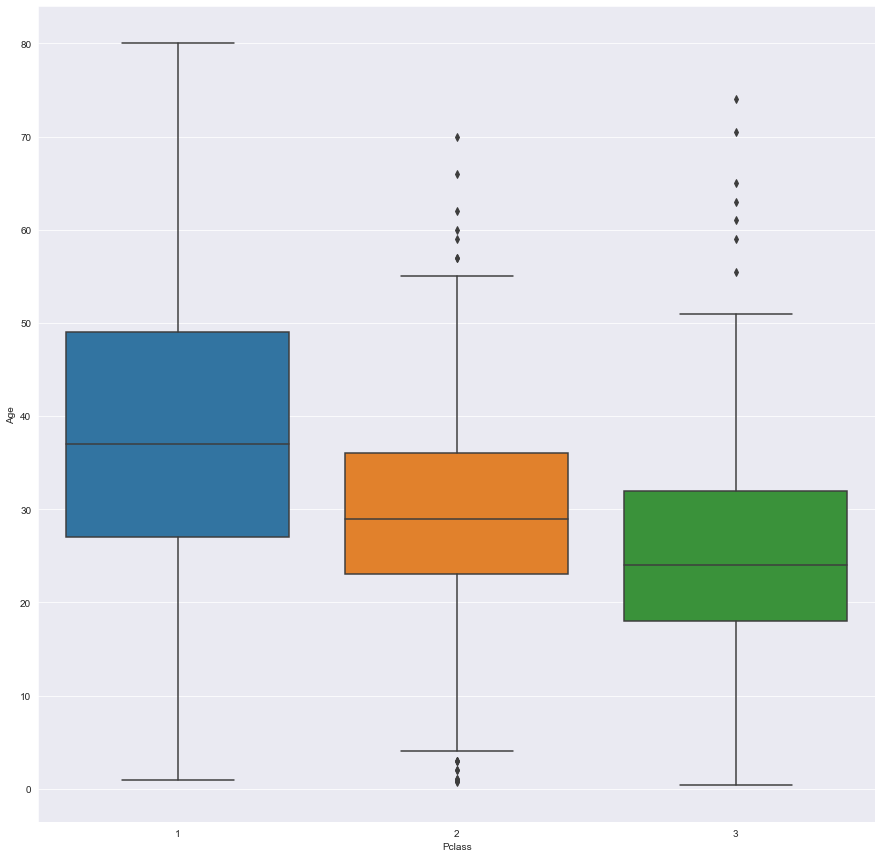

In [119]:
# we can fill the missing values in the Age column with the median age 
#and get ride of Cabin column because there are many missing values there
plt.figure(figsize=(15,15))
sns.boxplot(x="Pclass",y="Age",data=train)
#instead of using the mean of the age column, we can use separate means by every class by looking from the boxplot
#becasue the mean of every class is different

In [130]:
def age_mean(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [131]:
train["Age"]=train[["Age","Pclass"]].apply(age_mean,axis=1)

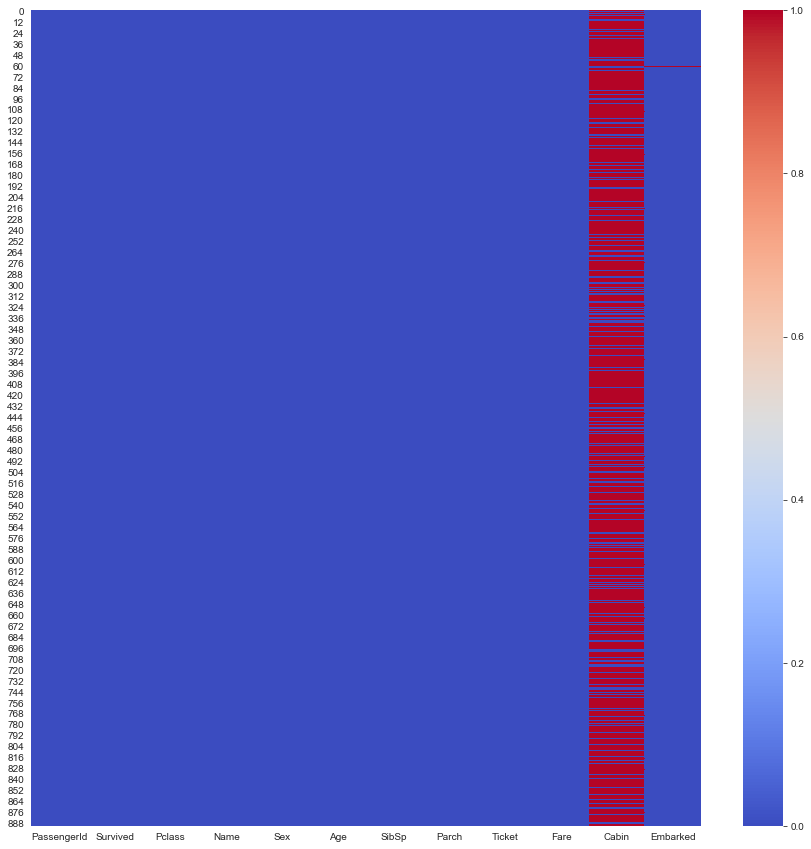

In [140]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap="coolwarm")
#As it is seen below there is not any null value in the Age column

In [143]:
#Because there are alot of missing values in the Cabin column, it is better to drop it
train.drop("Cabin",axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


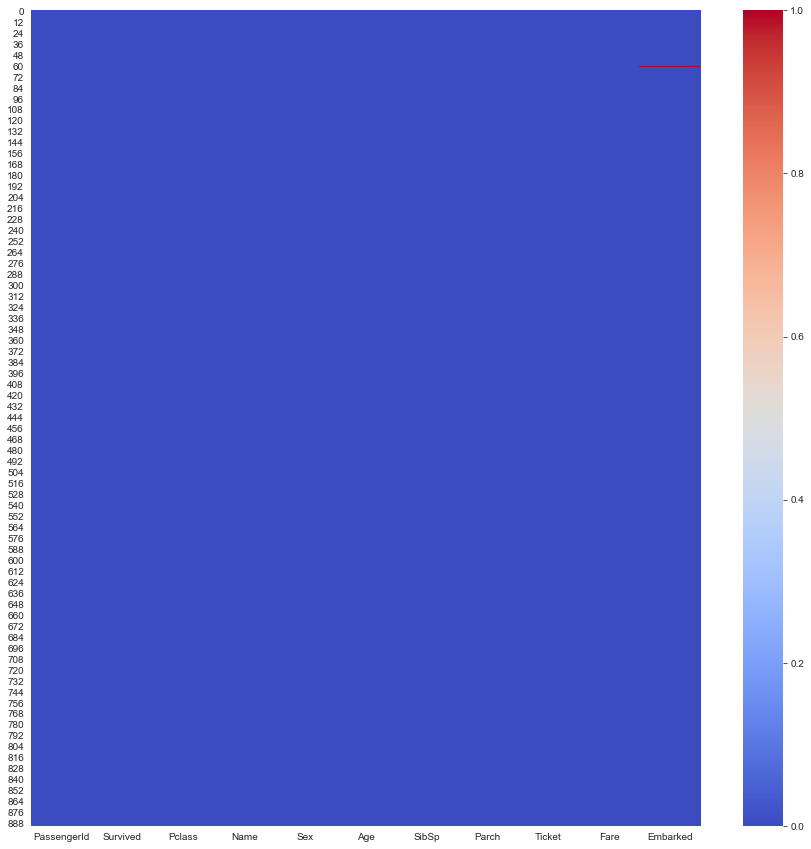

In [144]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap="coolwarm")

In [145]:
#Now there is just one missing value in the Embark column and we can just drop it
train.dropna(inplace=True)

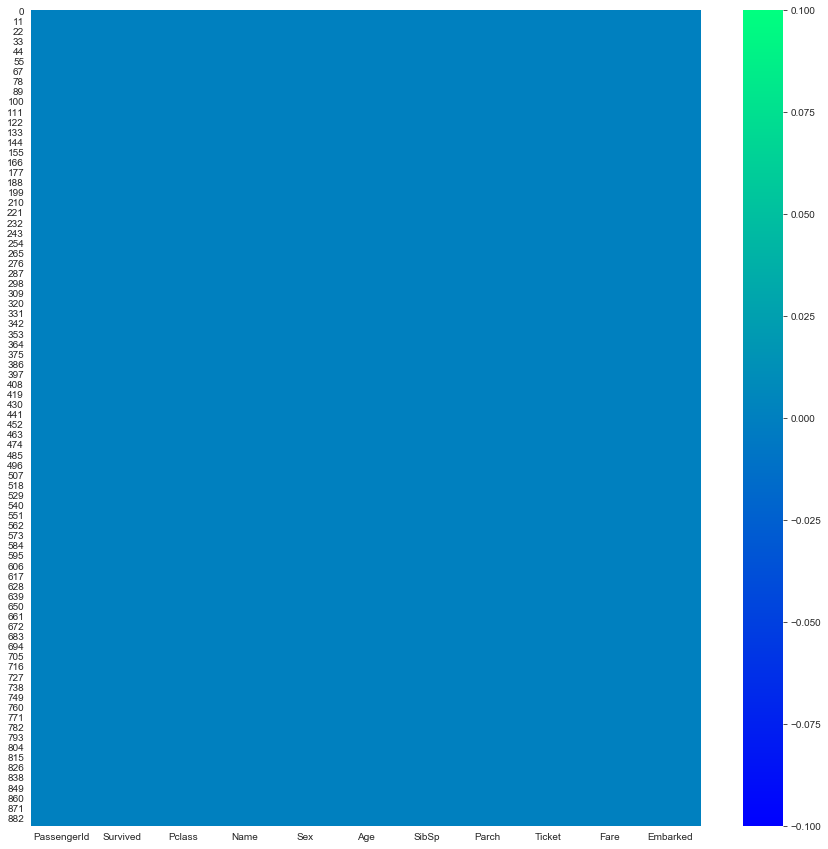

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(),cmap="winter") #Now there is not any missing value in the data

In [150]:
#Before applying logistic regression algorithm, we need to convert categorical values into dummy variable as 0 or 1
#Otherwise the algorithm will not be able to directly take these features as inputs
#we use pandas.get_dummies() method in order to convert categorical variables into numeric dummy ones
Sex=pd.get_dummies(train["Sex"],drop_first=True)# we need to use drop_first=True in order to get 1 for only one gender
Sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [155]:
Embark=pd.get_dummies(train["Embarked"],drop_first=True)
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [157]:
#Now we will add these values into our dataframe by using .concat() method
train=pd.concat([train,Sex,Embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [158]:
# we dont need Sex and Embarked columns anymore because we have replacement values for them for the algorithm
# We do not need also Name and Ticket column because they are not useful for our purpose and algorithm
train.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
train.head() 
#All the data is numerical ready for the algorithm

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [159]:
#PassegerId is just an index , so it should also be dropped
train.drop("PassengerId",axis=1,inplace=True)
train.head() #Now the data is perfectly ready for our algorithm

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [162]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [163]:
X=train[["Pclass","Age","SibSp","Parch","Fare","male","Q","S"]]
y=train["Survived"]

In [164]:
from sklearn.model_selection import train_test_split


In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [166]:
#After splitting data we import our model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression() # we create an instance of the model

In [167]:
#The next step is to train the model
logmodel.fit(X_train,y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [168]:
predictions=logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [169]:
#The next step is to evaluate our model
#Sklearn has very good classification report to use
from sklearn.metrics import classification_report # this return the model's accuracy.precision etc.
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
#TP=147
#FN=16
#FP=30
#TN=74

array([[147,  16],
       [ 30,  74]], dtype=int64)

a confusion matrix, also known as an error matrix. A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



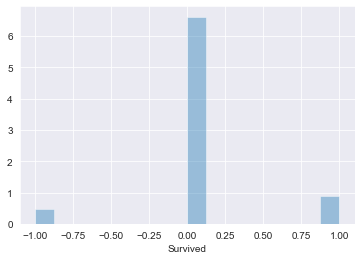

In [173]:
sns.distplot((y_test-predictions))

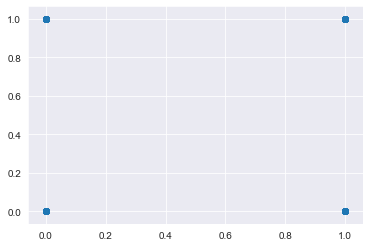